# Boston House Prices
### https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data

1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

### Cargo librerias necesarias

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

### Cargo el dataset 

In [2]:
path = r'C:\Users\fahv1\OneDrive\Documents\Boston-House-Prices\housing.csv'
dataset = pd.read_csv(path)

In [3]:
dataset.head(10)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
5,0.08829 12.50 7.870 0 0.5240 6.0120 66...
6,0.14455 12.50 7.870 0 0.5240 6.1720 96...
7,0.21124 12.50 7.870 0 0.5240 5.6310 100...
8,0.17004 12.50 7.870 0 0.5240 6.0040 85...
9,0.22489 12.50 7.870 0 0.5240 6.3770 94...


### Se observa que el dataset no contiene nombres de columnas y la separacion entre datos no es la correcta
### Por lo que se procede a asignarle etiquetas a las columnas respectivas y tambien se camnbia el separador por una expresion regular 

In [4]:
name_col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] #Lista de etiquetas de columnas 
dataset = pd.read_csv(path,names= name_col, sep ='\s+')
dataset # Dataset ya corregido 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Se observan las estadisticas de cada columna

In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 Se observa que toda la data tiene el tipo correcto 

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Visualizamos mediante histogramas las distintas variables 

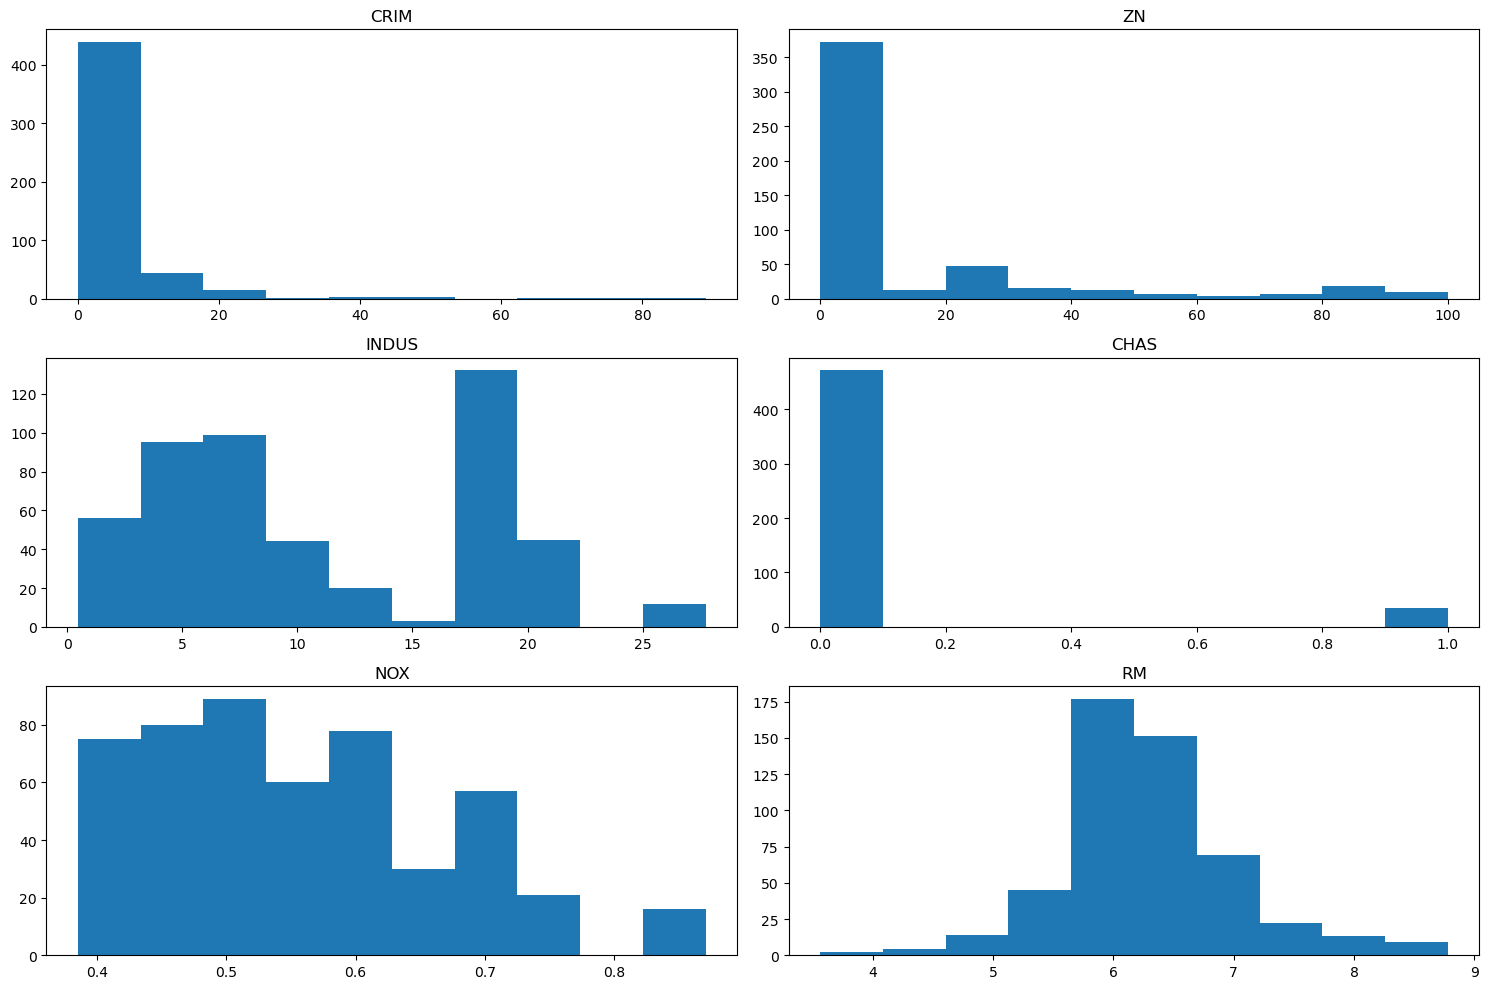

In [15]:
fig = plt.figure(figsize=(15,10))
for i in range(6):
    fig.add_subplot(3,2,i+1)
    plt.title(name_col[i])
    plt.hist(dataset[name_col[i]])
fig.tight_layout()



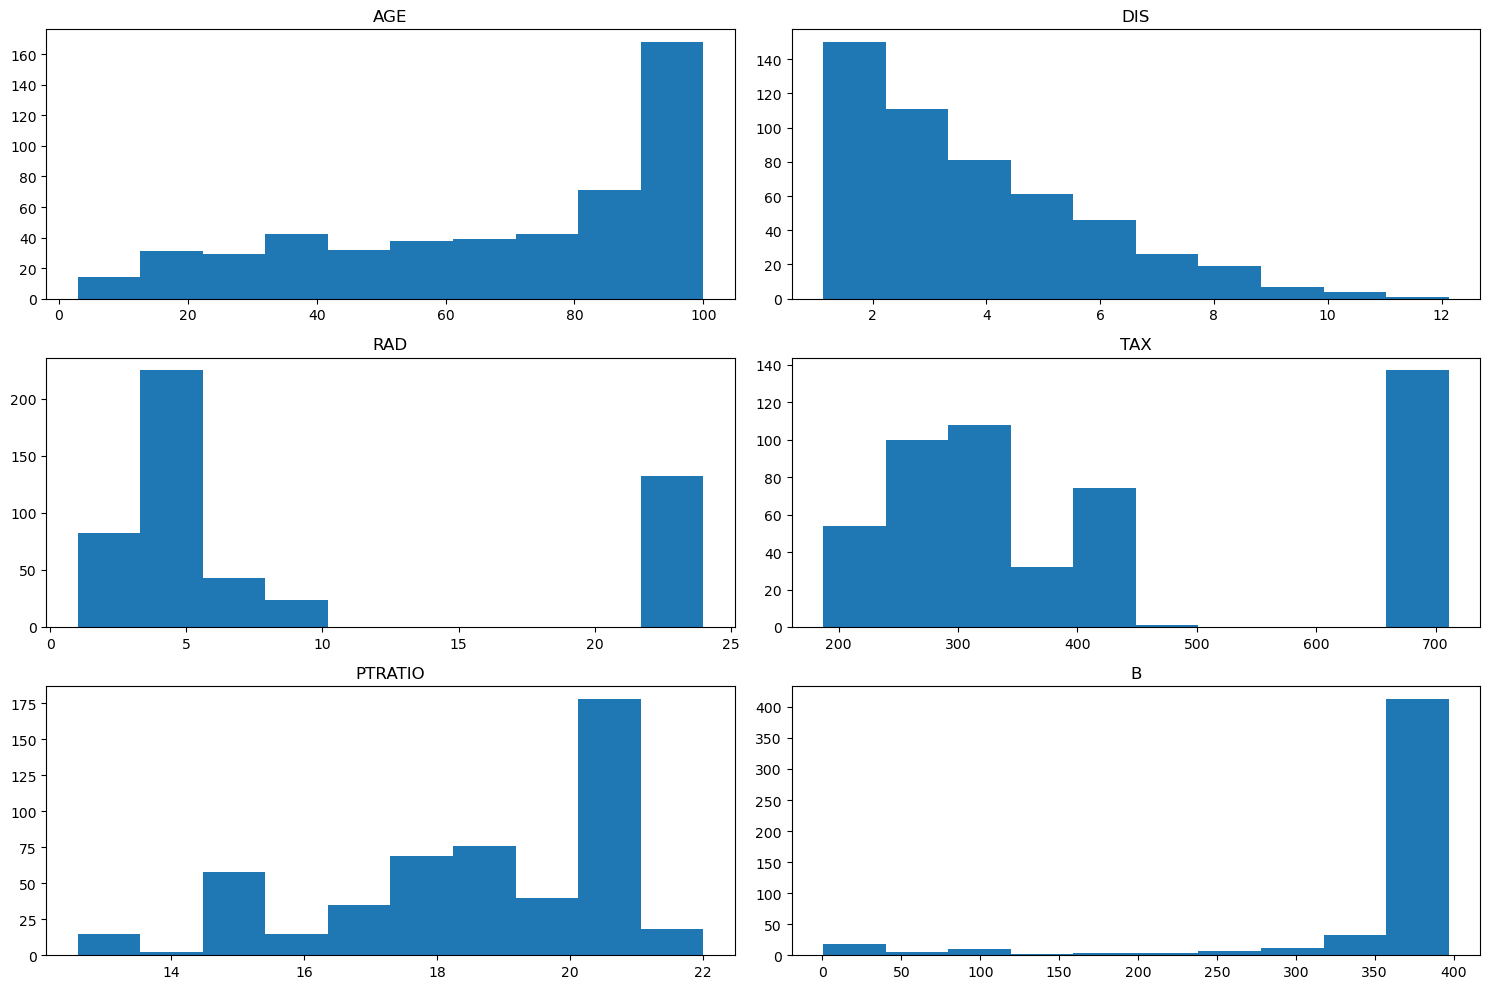

In [7]:
fig = plt.figure(figsize=(15,10))
j = 6
for i in range(6):
    fig.add_subplot(3,2,i+1)
    plt.title(name_col[j])
    plt.hist(dataset[name_col[j]])
    j+=1
fig.tight_layout()

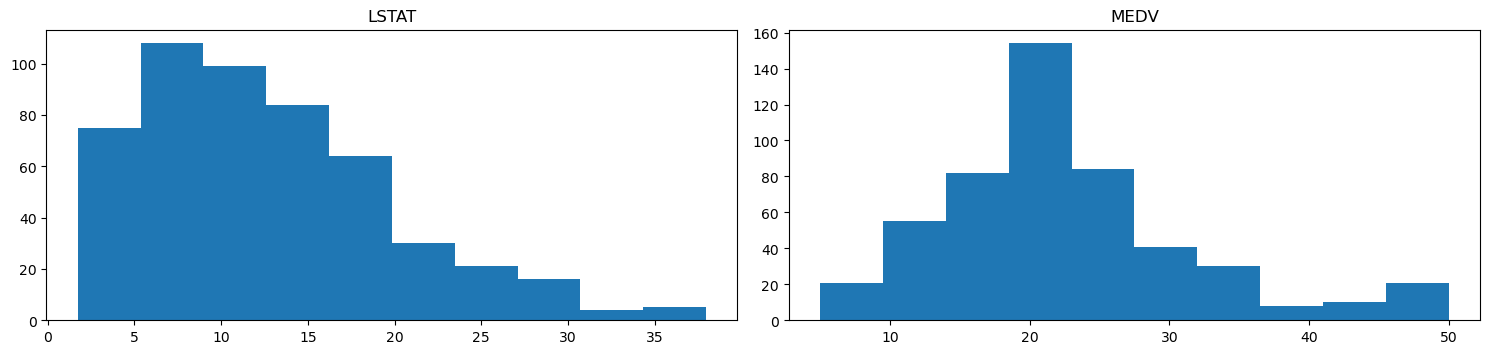

In [8]:
fig = plt.figure(figsize=(15,10))
j = 12
for i in range(2):
    fig.add_subplot(3,2,i+1)
    plt.title(name_col[j])
    plt.hist(dataset[name_col[j]])
    j+=1
fig.tight_layout()

### Mostramos un mapa de  correlacion entre las variables

Text(0.5, 1.0, 'Correlation Heatmap')

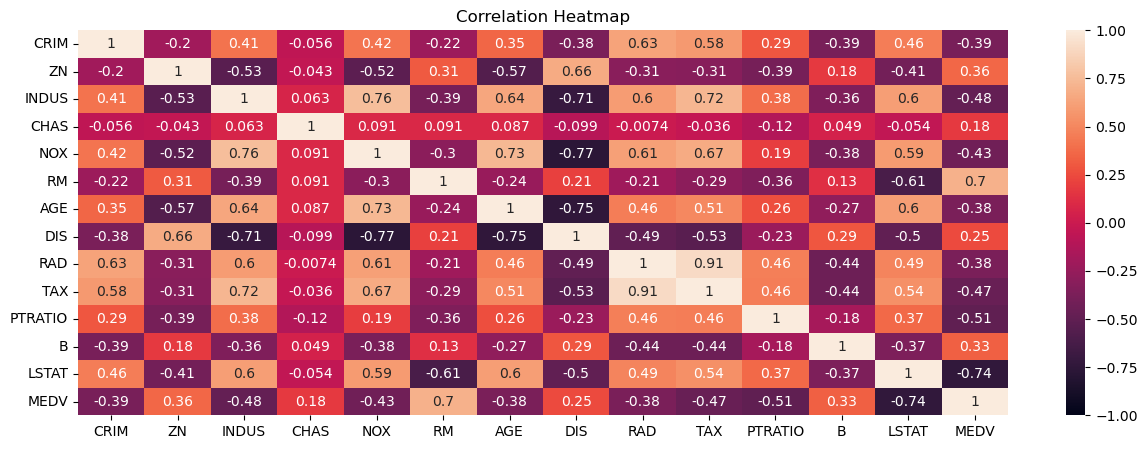

In [13]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(dataset.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap')

### A stronger correlation is evident between TAX, RAD, and LSTAT, with MEDV serving as the output variable to remember.

### Let's first erase outliers